In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\nutrients_data.csv')
data.head(7)

,Food,Measure,Grams,Calories,Protein,Fat,Sat. Fat,Fiber,Carbs,Category
0,Almonds,0.5 cups,70,425,13.00,38.00,28.00,1.8,13.0,Seeds and Nuts
1,Apple betty,1 cup,100,150,1.00,4.00,0.00,0.5,29.0,"Desserts, sweets"
2,Apple juice canned,1 cup,250,125,0.01,0.00,0.00,0.0,34.0,Fruits
3,Apple vinegar,0.33 cups,100,14,0.01,0.00,0.00,0.0,3.0,Fruits
4,Apples,0.75 cups,130,70,0.01,0.01,0.00,1.0,18.0,Fruits
5,Apricots,1 cup,250,220,2.00,0.01,0.00,1.0,57.0,Fruits
6,Artichoke,1.5 cups,100,16285,2.00,0.01,0.01,2.0,10.0,Vegetables


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      258 non-null    object 
 1   Measure   258 non-null    object 
 2   Grams     258 non-null    int64  
 3   Calories  258 non-null    int64  
 4   Protein   258 non-null    float64
 5   Fat       258 non-null    float64
 6   Sat. Fat  256 non-null    float64
 7   Fiber     258 non-null    float64
 8   Carbs     258 non-null    float64
 9   Category  258 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 20.3+ KB


In [4]:
categorical_columns = data.select_dtypes('O').columns
data[categorical_columns].describe()

,Food,Measure,Category
count,258,258,258
unique,258,24,12
top,Almonds,1 cup,Vegetables
freq,1,97,59


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      258 non-null    object 
 1   Measure   258 non-null    object 
 2   Grams     258 non-null    int64  
 3   Calories  258 non-null    int64  
 4   Protein   258 non-null    float64
 5   Fat       258 non-null    float64
 6   Sat. Fat  256 non-null    float64
 7   Fiber     258 non-null    float64
 8   Carbs     258 non-null    float64
 9   Category  258 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 20.3+ KB


# Statistical Analysis

In [6]:
numerical_columns = data.select_dtypes(['float64','int64']).columns
data[numerical_columns].describe()

,Grams,Calories,Protein,Fat,Sat. Fat,Fiber,Carbs
count,258.000000,258.000000,258.000000,258.000000,256.000000,258.000000,258.000000
mean,143.108527,247.158915,8.880891,8.902287,6.465312,2.378953,22.953140
std,148.232111,1017.836747,18.455170,20.791285,19.422660,16.802929,33.061858
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,75.000000,1.000000,0.010000,0.000000,0.000000,2.000000
50%,100.000000,135.000000,3.000000,2.000000,0.005000,0.200000,12.500000
75%,200.000000,253.750000,12.000000,10.000000,7.000000,1.000000,29.750000
max,1419.000000,16285.000000,232.000000,233.000000,234.000000,235.000000,236.000000


In [7]:
summary_stats = data.groupby('Category').agg({
    'Calories':['mean','median'],
    'Protein':['mean','median'],
    'Fat':['mean','median'],
    'Sat. Fat':['mean','median'],
    'Fiber':['mean','median'],
    'Carbs':['mean','median'],
}).reset_index()

summary_stats

Category    Calories           Protein         \
                                             mean median       mean median   
0   Breads, cereals, fastfood, grains  231.781250  153.5   8.875312   5.00   
1                      Dairy products  298.250000  237.5  18.700000   9.00   
2                    Desserts, sweets  236.500000  170.0   2.668750   2.50   
3          Drinks, Alcohol, Beverages   92.000000  105.0   0.002727   0.00   
4             Fats, Oils, Shortenings  301.454545  125.0  10.912727   0.01   
5                       Fish, Seafood  153.263158  170.0  31.894737  20.00   
6                              Fruits  164.764706  120.0   1.178529   1.00   
7                       Jams, Jellies   66.250000   50.0   0.002500   0.00   
8                       Meat, Poultry  268.652174  265.0  17.826087  19.00   
9                      Seeds and Nuts  331.818182  300.0   9.727273  12.00   
10                              Soups  119.100000  107.5   5.900000   6.00   
11                         Vegetables  348.847458   45.0   3.848475   2.00   

          Fat          Sat. Fat             Fiber             Carbs         
         mean median       mean median       mean median       mean median  
0    4.064375   2.50   1.468750    0.0   3.245312   0.40  40.437500  27.50  
1   12.801500  10.00  10.551500    9.0   0.120000   0.00  25.052500  19.50  
2    6.167917   5.00   5.209167    4.0   0.438750   0.01  43.791667  32.50  
3    0.000909   0.00   0.000000    0.0   0.000000   0.00  14.728182   8.00  
4   44.909091  14.00  36.454545    5.0  10.636364   0.00  11.002727   0.01  
5   18.263158   7.00  13.263158    0.0  12.368421   0.00  13.842632   0.00  
6    1.330882   0.01   0.970882    0.0   1.412059   1.00  40.941176  27.50  
7    0.000000   0.00   0.000000    0.0   2.000000   0.00  16.750000  13.00  
8   18.782609  15.00  13.772727   12.5   0.001304   0.00   2.391304   0.00  
9   29.818182  26.00  18.272727   17.0   1.527273   1.20  11.545455   9.00  
10   4.100000   3.50   4.300000    3.5   0.400000   0.50  15.500000  13.50  
11   1.278136   0.01   0.673448    0.0   1.155085   1.00  12.437458   9.00

In [8]:
data.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat. Fat,Fiber,Carbs,Category
0,Almonds,0.5 cups,70,425,13.00,38.00,28.0,1.8,13.0,Seeds and Nuts
1,Apple betty,1 cup,100,150,1.00,4.00,0.0,0.5,29.0,"Desserts, sweets"
2,Apple juice canned,1 cup,250,125,0.01,0.00,0.0,0.0,34.0,Fruits
3,Apple vinegar,0.33 cups,100,14,0.01,0.00,0.0,0.0,3.0,Fruits
4,Apples,0.75 cups,130,70,0.01,0.01,0.0,1.0,18.0,Fruits


# High Protein and Low Sat. Fat

In [9]:
high_protein_low_satfat = data[(data['Protein'] > data['Protein'].quantile(0.75)) &
                               (data['Sat. Fat'] < data['Sat. Fat'].quantile(0.50)) &
                               (data['Fat'] < data['Fat'].quantile(0.75))]

high_protein_low_satfat.sort_values(by='Protein', ascending=False)

,Food,Measure,Grams,Calories,Protein,Fat,Sat. Fat,Fiber,Carbs,Category
90,Flounder,0.4375 cups,100,200,30.0,8.00,0.0,0.0,0.00,"Fish, Seafood"
55,Cod,0.4375 cups,100,170,28.0,5.00,0.0,0.0,0.00,"Fish, Seafood"
232,Swordfish,1 unit,100,180,27.0,6.00,0.0,0.0,0.00,"Fish, Seafood"
108,Halibut,0.4375 cups,100,182,26.0,8.00,0.0,0.0,0.00,"Fish, Seafood"
214,Shrimp,0.375 cups,85,110,23.0,1.00,0.0,0.0,0.00,"Fish, Seafood"
133,Lobster,1 cup,100,92,18.0,1.00,0.0,0.0,0.01,"Fish, Seafood"
135,Mackerel,0.375 cups,85,155,18.0,9.00,0.0,0.0,0.00,"Fish, Seafood"
209,Scallops,0.4375 cups,100,104,18.0,8.00,0.0,0.0,10.00,"Fish, Seafood"
129,Lentils,1 cup,200,212,15.0,0.01,0.0,2.4,38.00,Vegetables
193,Red kidney,1 cup,260,230,15.0,1.00,0.0,2.5,42.00,Vegetables


In [10]:
data.columns

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat. Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

# Food content Distribution 

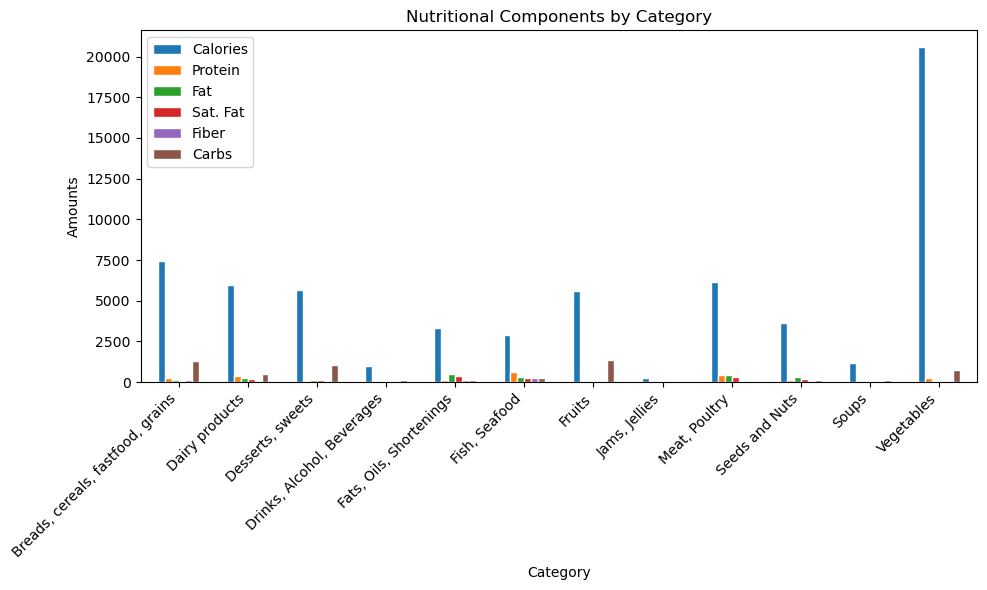

In [11]:
required_columns = ['Calories', 'Protein', 'Fat', 'Sat. Fat','Fiber', 'Carbs']
grouped_data = data.groupby('Category')[required_columns].sum()

fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax = ax, edgecolor='white', width = 0.6)

ax.set_xticklabels([str(q) for q in grouped_data.index], rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Amounts')
plt.title('Nutritional Components by Category')
plt.tight_layout()
plt.show()

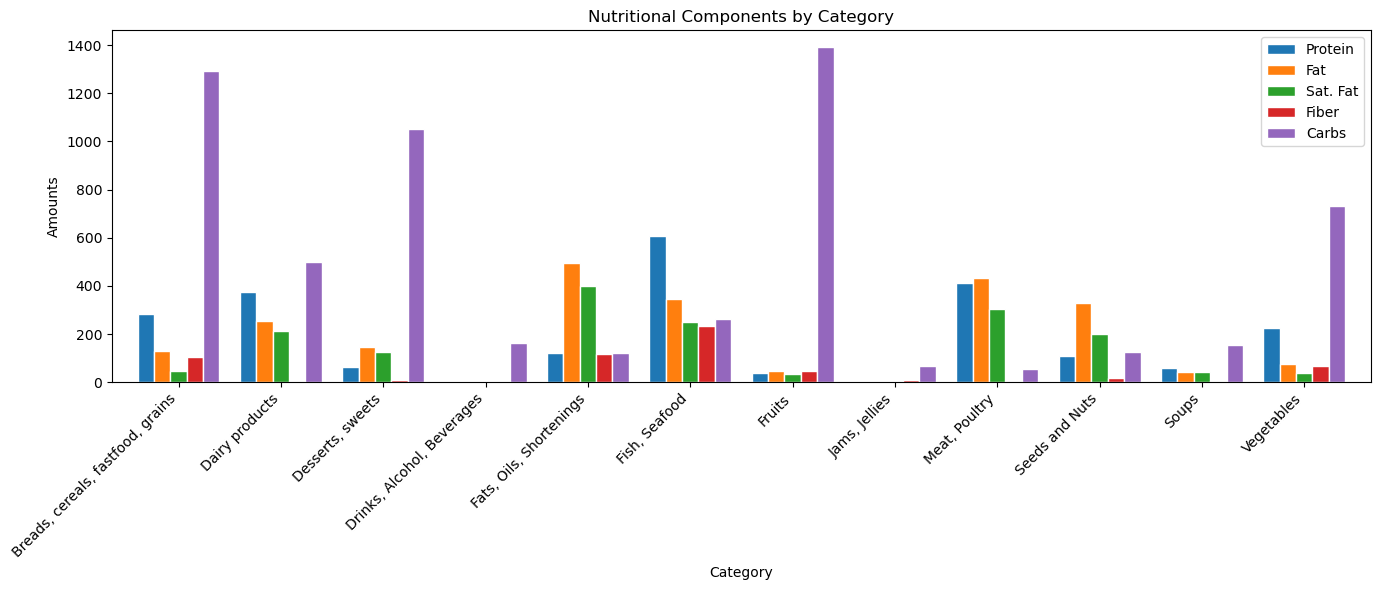

In [12]:
required_columns = ['Protein', 'Fat', 'Sat. Fat','Fiber', 'Carbs']
grouped_data = data.groupby('Category')[required_columns].sum()

fig, ax = plt.subplots(figsize=(14, 6))
grouped_data.plot(kind='bar', ax = ax, edgecolor='white', width = 0.8)

ax.set_xticklabels([str(q) for q in grouped_data.index], rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Amounts')
plt.title('Nutritional Components by Category')
plt.tight_layout()
plt.show()

More-


-- Fiber:
Higher fiber content is generally beneficial for digestive health and can help with weight management and lowering the risk of chronic diseases.

-- Protein:
Sufficient protein intake is essential for muscle repair, immune function, and overall health. It’s often considered good to have more protein in the diet, particularly for active individuals or those looking to build muscle.

-- Carbs: Carbohydrates are a primary source of energy. However, it's crucial to focus on the type of carbs (complex vs. simple) and their quantity, aiming for complex carbs (like whole grains) rather than simple sugars.


Less-


-- Fat: While fat is necessary for bodily functions, excessive intake can lead to health issues such as heart disease. It’s beneficial to limit total fat intake and focus on healthy fats.

-- Saturated Fat: Saturated fats, found in animal products and some processed foods, should be consumed in moderation as they can raise cholesterol levels and increase the risk of heart disease.

-- Calories: Managing calorie intake is crucial for maintaining a healthy weight. Consuming more calories than needed can lead to weight gain, while too few can lead to malnutrition. Balancing calorie intake according to your energy expenditure is key.

# Correlation Analysis

<Axes: >

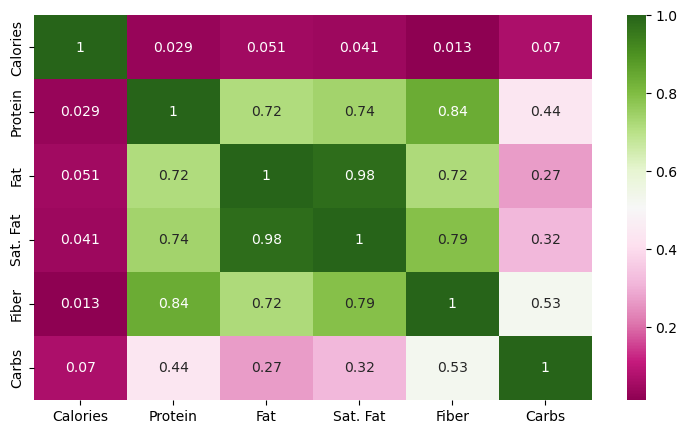

In [13]:
corr_data = data[['Calories', 'Protein', 'Fat', 'Sat. Fat', 'Fiber', 'Carbs']]
plt.figure(figsize=(9,5))
sns.heatmap(corr_data.corr(), annot = True, cmap = 'PiYG')

High Correlations:

- Fat and Saturated Fat: Strongly related due to their nature.
- Protein and Saturated Fat: Strongly related, especially in high-fat protein sources.
- Fiber and Protein: High correlation due to the presence of fiber-rich protein sources.
    
    
Moderate Correlations:

- Fiber and Fat: Moderate association due to high-fiber foods sometimes containing fats.
- Fiber and Carbs: Moderate correlation as many high-fiber foods are also high in carbs.
- Carbs and Protein: Moderate association as some foods contain both nutrients.

# High Fat and High Saturated Fat Analysis

In [14]:
highfat_and_highsatfat = data[(data['Fat'] > data['Fat'].quantile(0.80)) & 
                             (data['Sat. Fat'] > data['Sat. Fat'].quantile(0.80))]
highfat_and_highsatfat_sorted = highfat_and_highsatfat.sort_values(by='Fat', ascending=False)
highfat_and_highsatfat_top = highfat_and_highsatfat_sorted.groupby('Category').head(5)

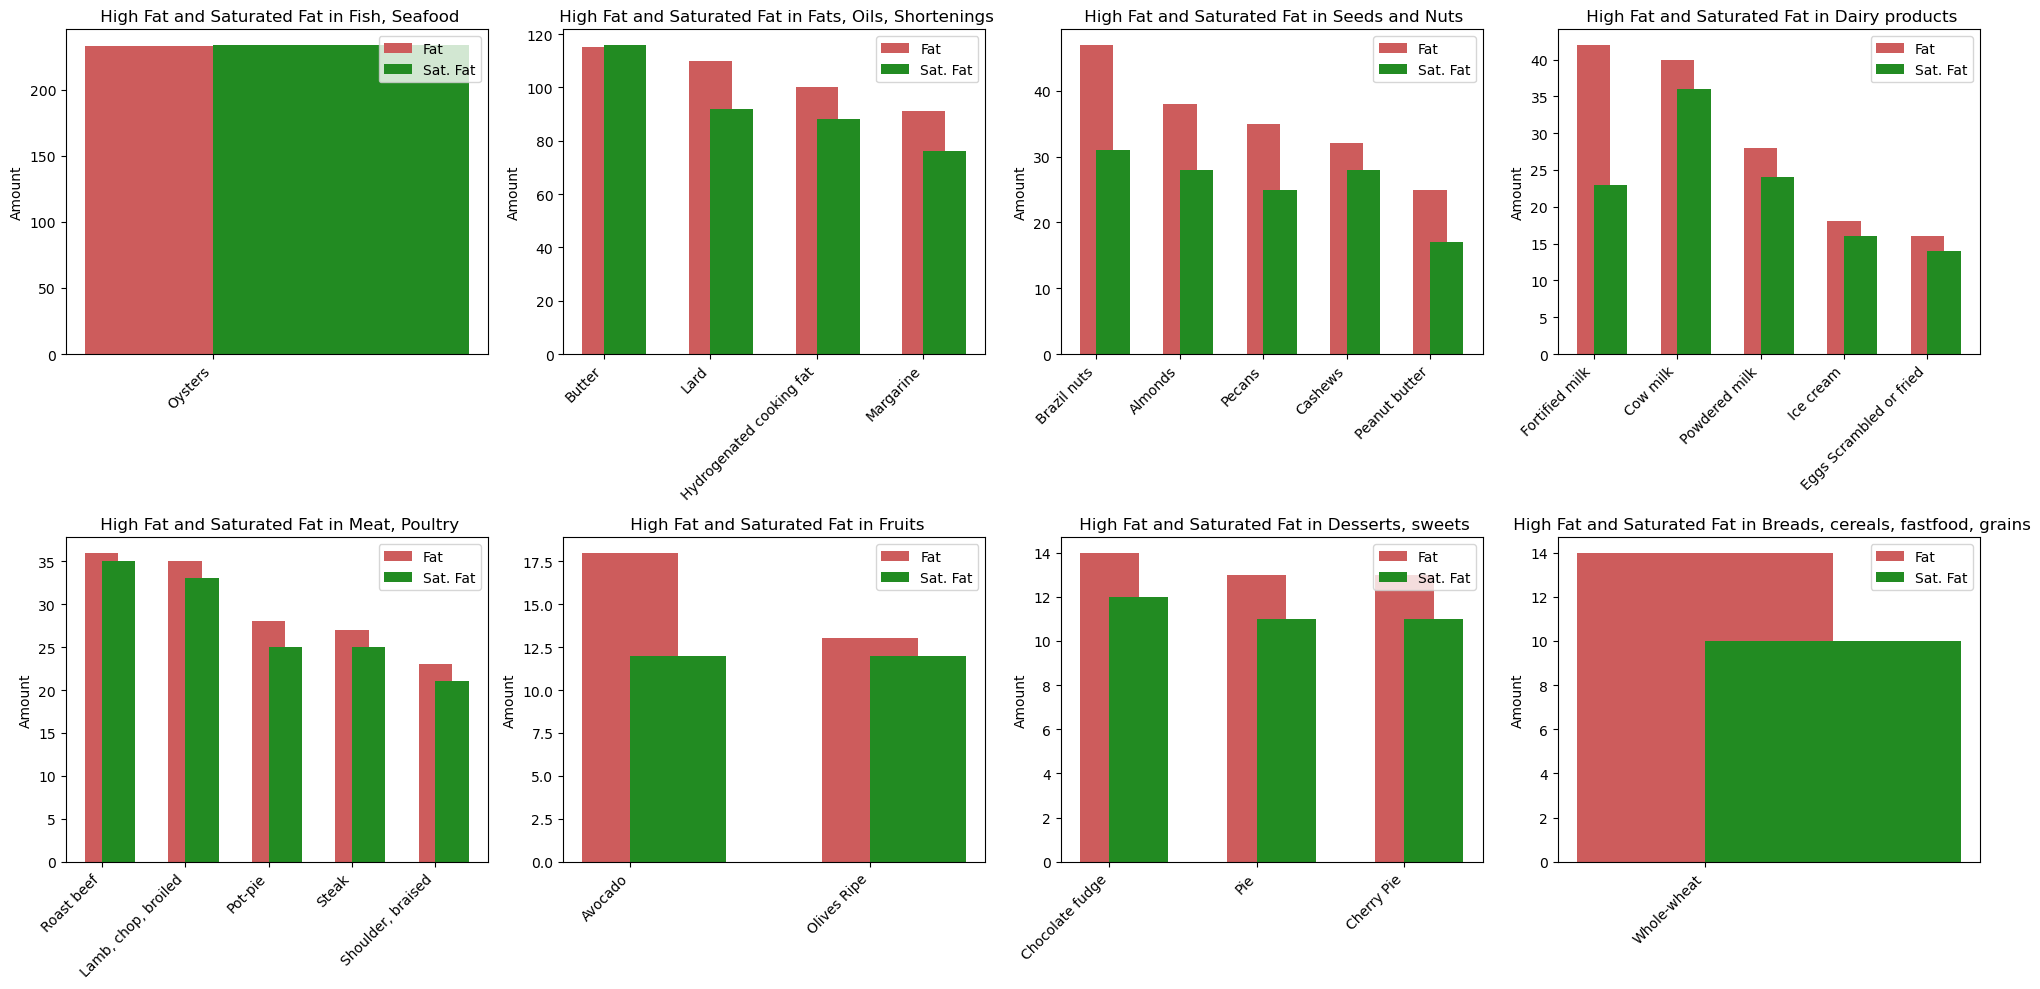

In [15]:
categories = highfat_and_highsatfat_top['Category'].unique()
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20, 10))
axes = axes.flatten()
for ax, category in zip(axes, categories):
    category_data = highfat_and_highsatfat_top[highfat_and_highsatfat_top['Category'] == category]
    food_items = category_data['Food']
    fat_values = category_data['Fat']
    sat_fat_values = category_data['Sat. Fat']
    
    # Plot bars for Fat and Sat. Fat
    ax.bar(food_items, fat_values, width=0.4, label='Fat', align='center', color='indianred')
    ax.bar(food_items, sat_fat_values, width=0.4, label='Sat. Fat', align='edge',color='forestgreen')

    ax.set_ylabel('Amount')
    ax.set_title(f' High Fat and Saturated Fat in {category}')
    ax.legend()
    ax.set_xticklabels(food_items, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Low Fat and Low Saturated Fat Analysis

In [16]:
low_fat_low_satfat = data[(data['Fat'] < data['Fat'].quantile(0.75)) & 
                             (data['Sat. Fat'] < data['Sat. Fat'].quantile(0.75))]
low_fat_low_satfat_sorted = low_fat_low_satfat.sort_values(by='Fat', ascending=True)
low_fat_low_satfat_top = low_fat_low_satfat_sorted.groupby('Category').head(5)

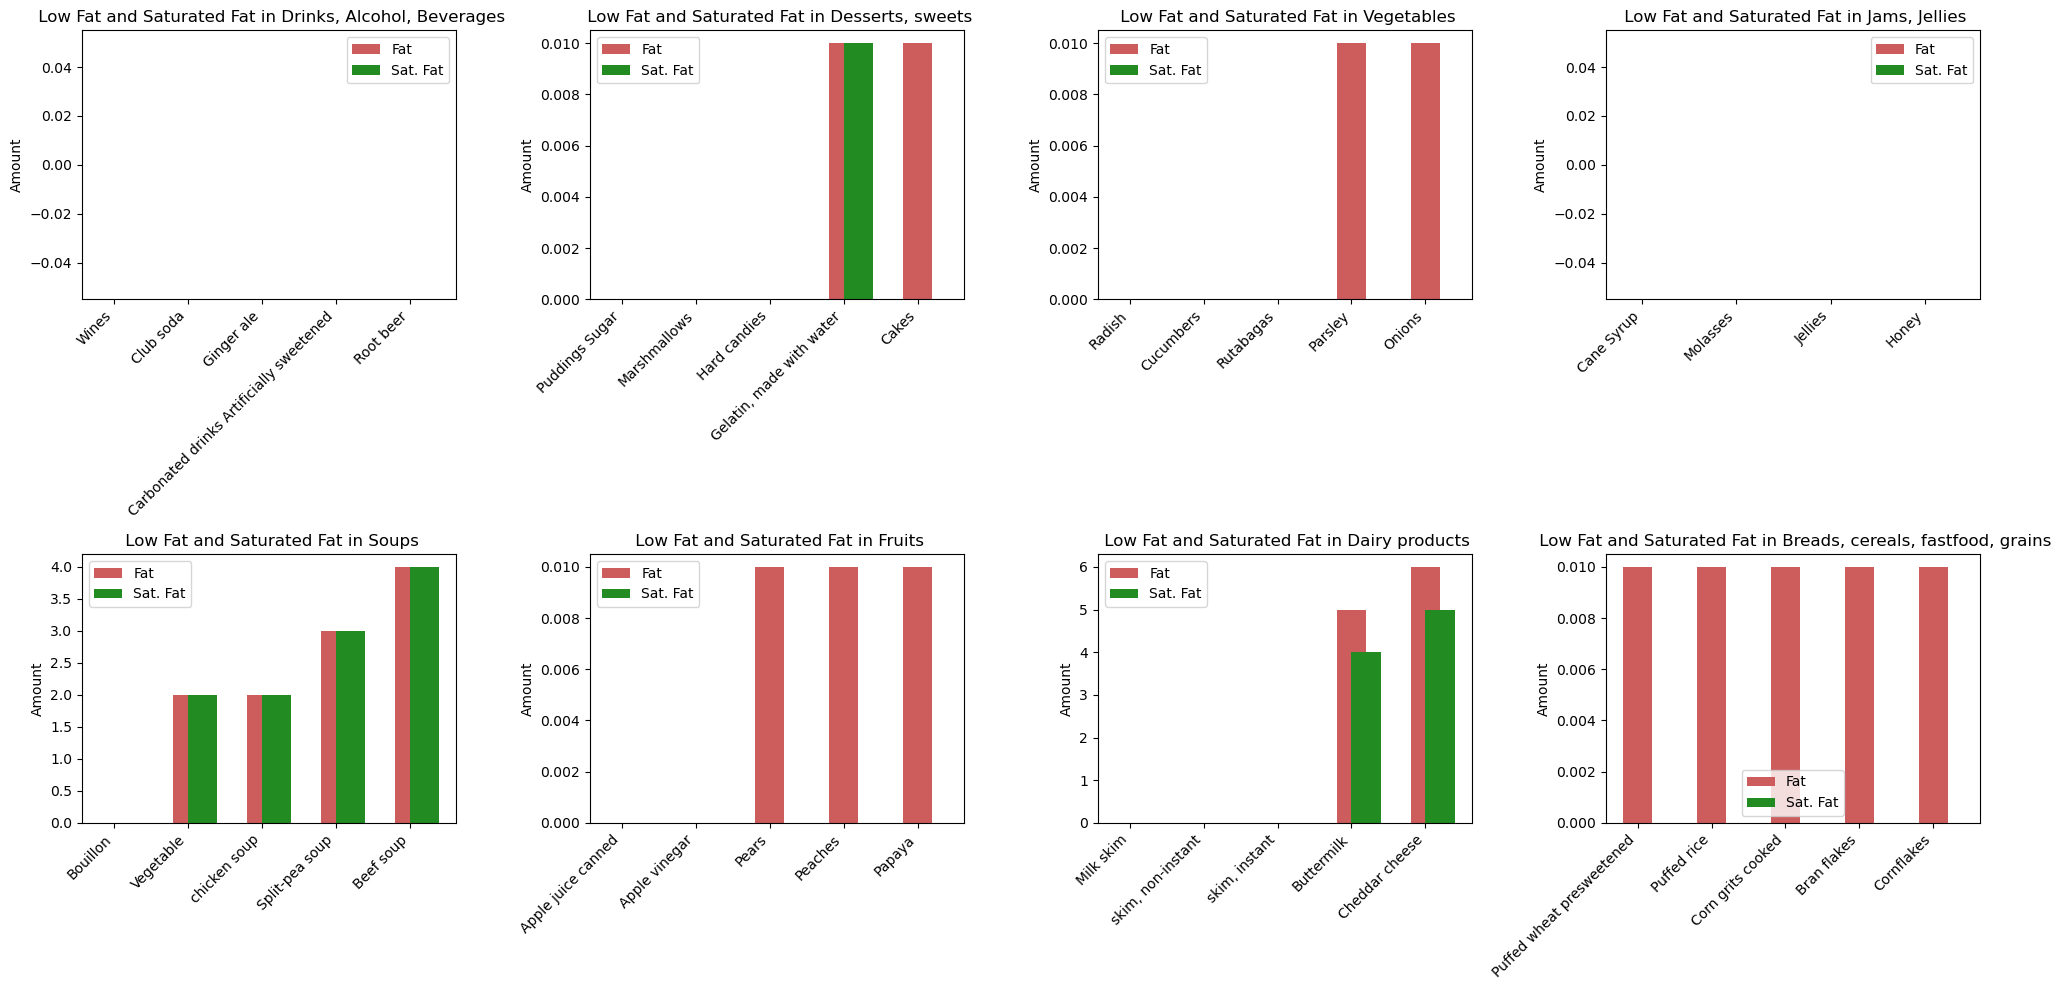

In [17]:
categories = low_fat_low_satfat_top['Category'].unique()
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20, 10))
axes = axes.flatten()
for ax, category in zip(axes, categories):
    category_data = low_fat_low_satfat_top[low_fat_low_satfat_top['Category'] == category]
    food_items = category_data['Food']
    fat_values = category_data['Fat']
    sat_fat_values = category_data['Sat. Fat']
    
    ax.bar(food_items, fat_values, width=0.4, label='Fat', align='center', color='indianred')
    ax.bar(food_items, sat_fat_values, width=0.4, label='Sat. Fat', align='edge', color='forestgreen')

    ax.set_ylabel('Amount')
    ax.set_title(f' Low Fat and Saturated Fat in {category}')
    ax.legend()
    ax.set_xticklabels(food_items, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# High Protein and High Fat Analyis

In [18]:
highprotein_and_highfat = data[(data['Protein'] > data['Protein'].quantile(0.80)) &
                              (data['Fat'] > data['Fat'].quantile(0.80))]
highprotein_and_highfat_sorted = highprotein_and_highfat.sort_values(by='Protein', ascending=False)
highprotein_and_highfat_top = highprotein_and_highfat_sorted.groupby('Category').head(5)

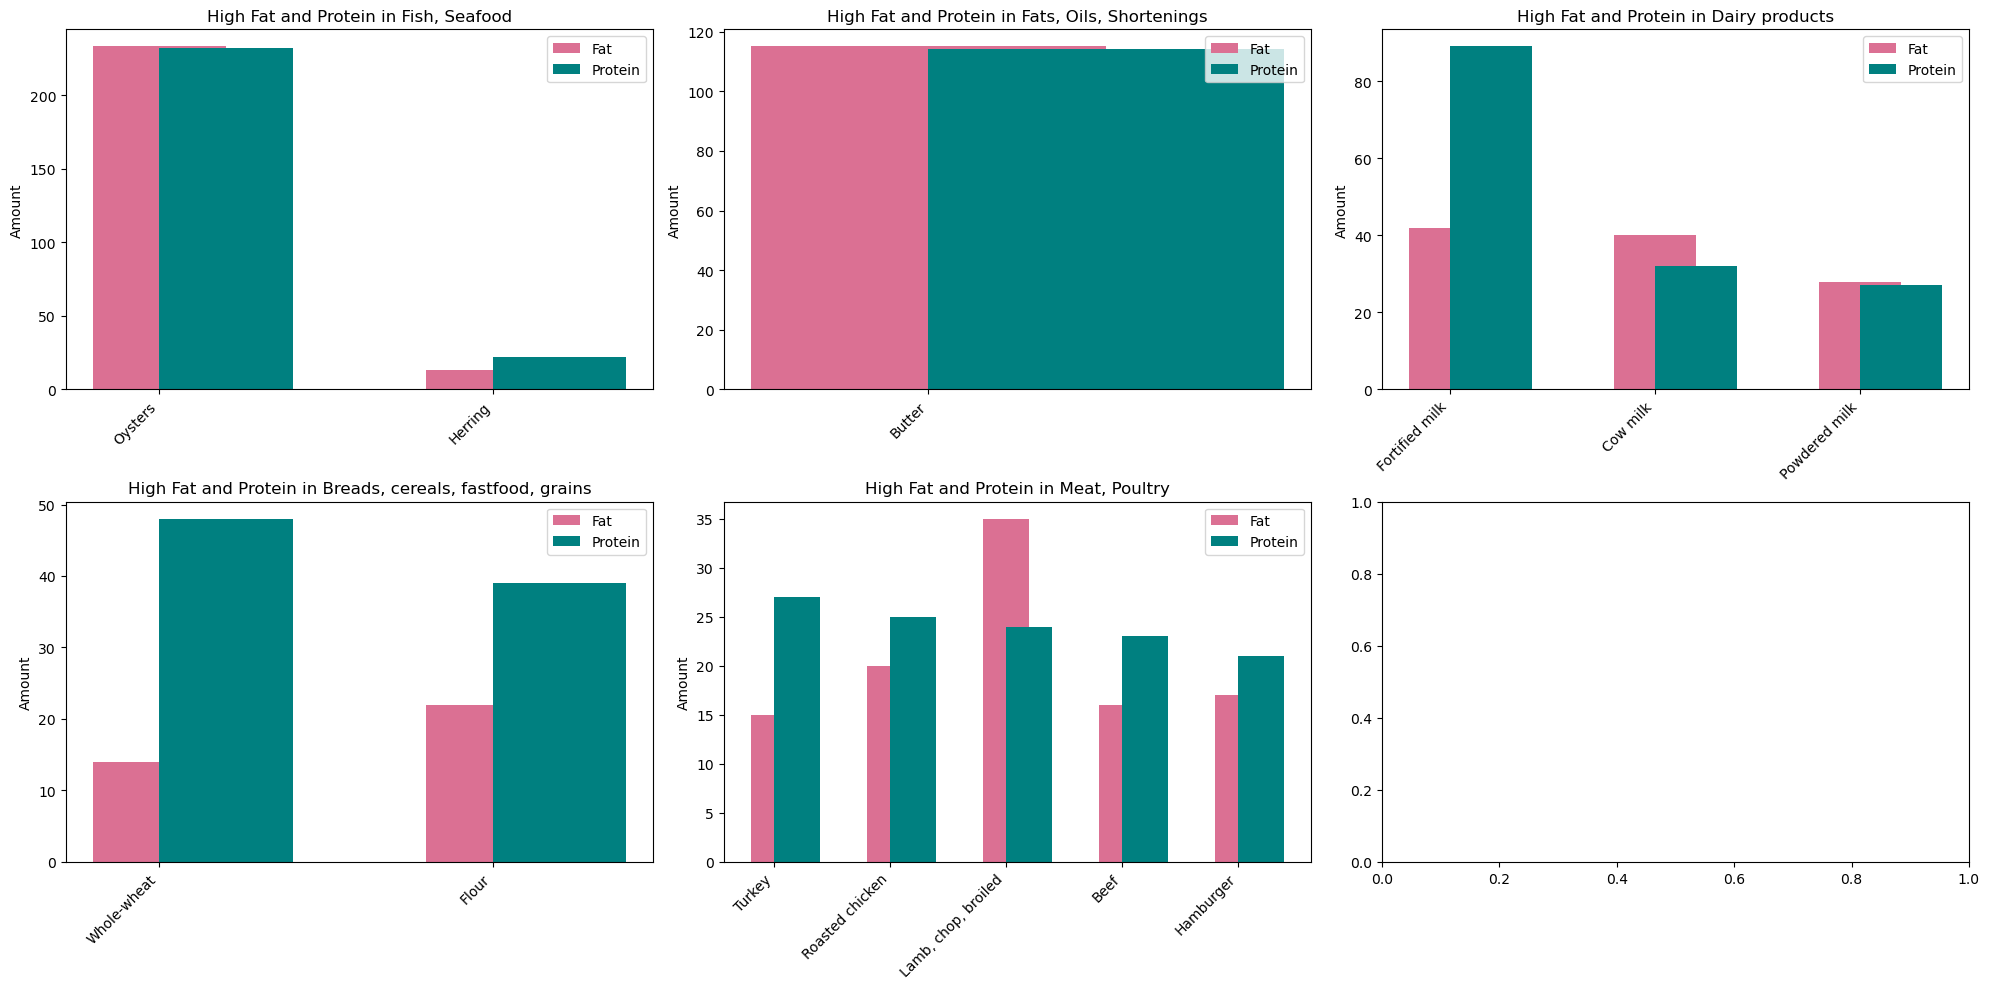

In [19]:
categories = highprotein_and_highfat_top['Category'].unique()
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20, 10))
axes = axes.flatten()
for ax, category in zip(axes, categories):
    category_data = highprotein_and_highfat_top[highprotein_and_highfat_top['Category'] == category]
    food_items = category_data['Food']
    fat_values = category_data['Fat']
    protein_values = category_data['Protein']
    
    ax.bar(food_items, fat_values, width=0.4, label='Fat', align='center',color='palevioletred')
    ax.bar(food_items, protein_values, width=0.4, label='Protein', align='edge',color = 'teal')

    ax.set_ylabel('Amount')
    ax.set_title(f'High Fat and Protein in {category}')
    ax.legend()
    ax.set_xticklabels(food_items, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Low Protein and Low Fat Analyis

In [20]:
lowprotein_and_lowfat = data[(data['Protein'] < data['Protein'].quantile(0.60)) &
                              (data['Fat'] < data['Fat'].quantile(0.60))]
lowprotein_and_lowfat_sorted = lowprotein_and_lowfat.sort_values(by='Protein', ascending=True)
lowprotein_and_lowfat_top = lowprotein_and_lowfat_sorted.groupby('Category').head(5)

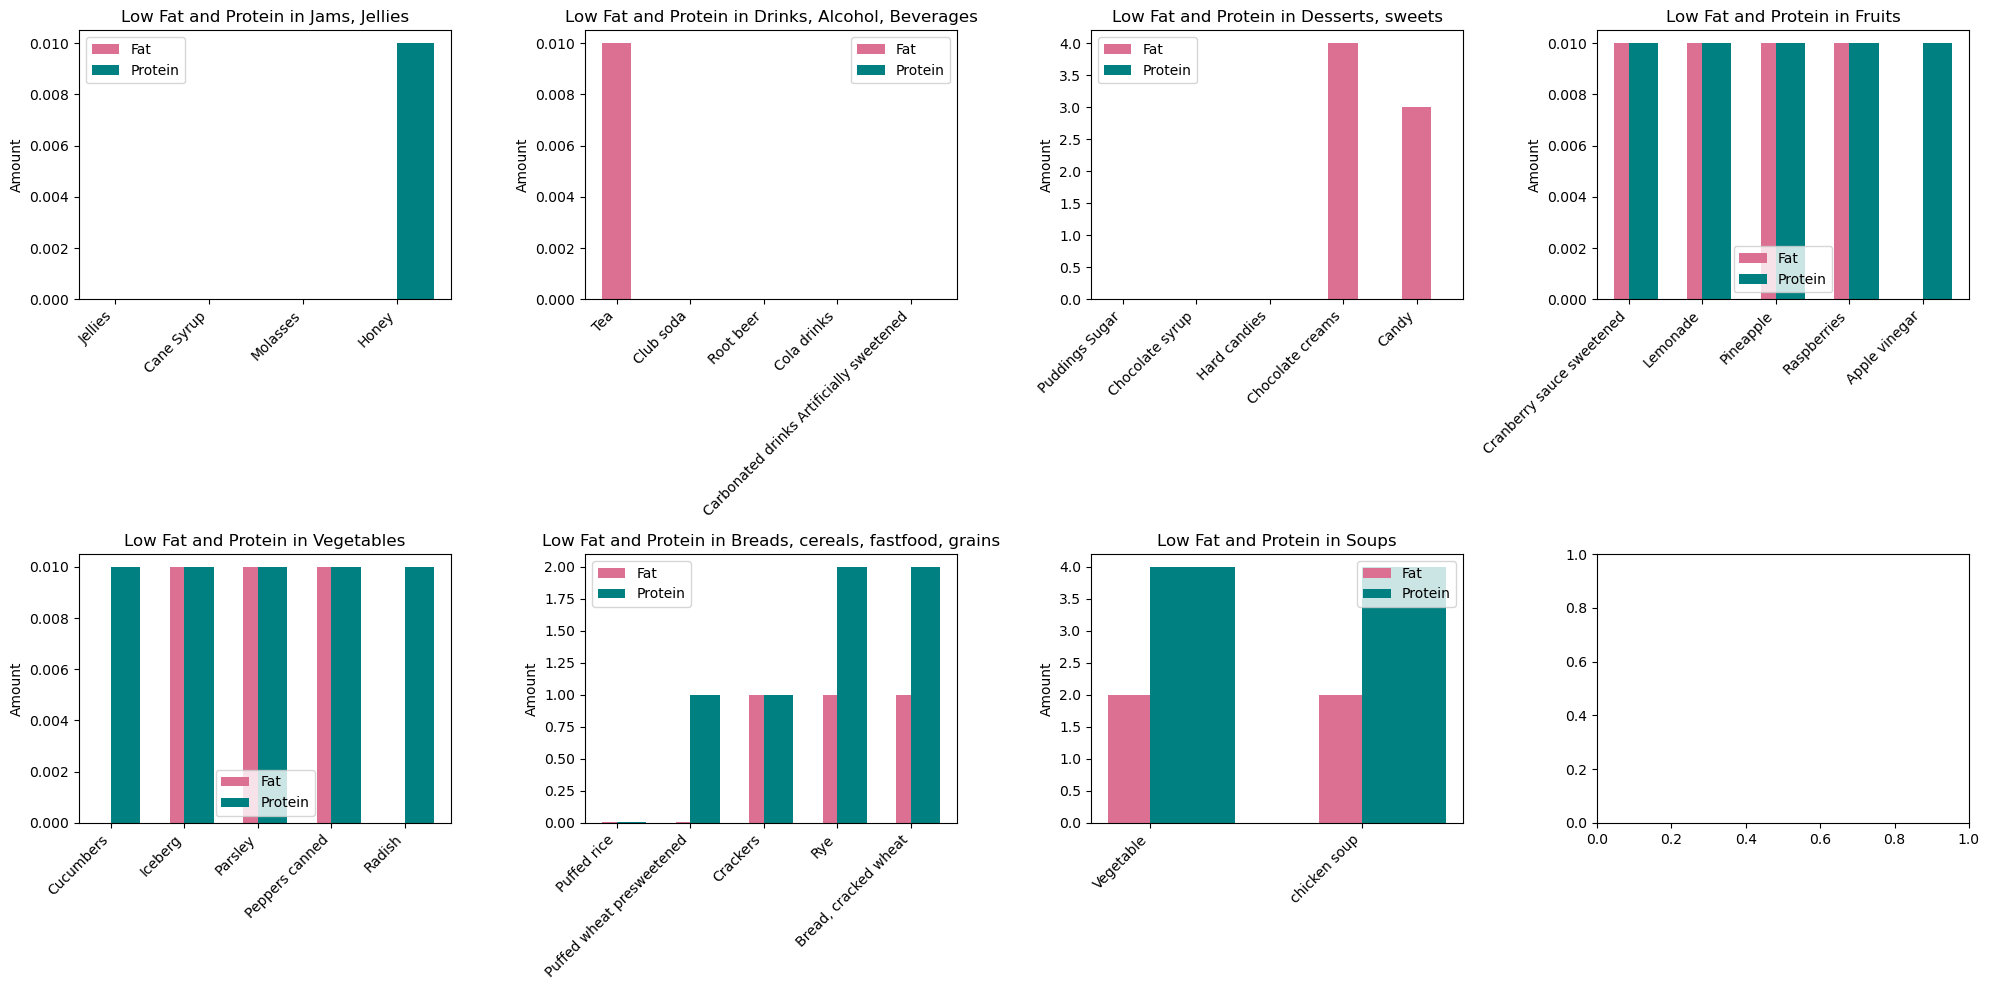

In [21]:
categories = lowprotein_and_lowfat_top['Category'].unique()
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20, 10))
axes = axes.flatten()
for ax, category in zip(axes, categories):
    category_data = lowprotein_and_lowfat_top[lowprotein_and_lowfat_top['Category'] == category]
    food_items = category_data['Food']
    fat_values = category_data['Fat']
    protein_values = category_data['Protein']
    
    ax.bar(food_items, fat_values, width=0.4, label='Fat', align='center',color='palevioletred')
    ax.bar(food_items, protein_values, width=0.4, label='Protein', align='edge',color = 'teal')

    ax.set_ylabel('Amount')
    ax.set_title(f'Low Fat and Protein in {category}')
    ax.legend()
    ax.set_xticklabels(food_items, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# High Protein and High Fiber Analyis

In [22]:
highprotein_and_highfiber = data[(data['Protein'] > data['Protein'].quantile(0.75)) &
                              (data['Fiber'] > data['Fiber'].quantile(0.75))]
highprotein_and_highfiber_sorted = highprotein_and_highfiber.sort_values(by='Protein', ascending=False)
highprotein_and_highfiber_top5 = highprotein_and_highfiber_sorted.groupby('Category').head(5)

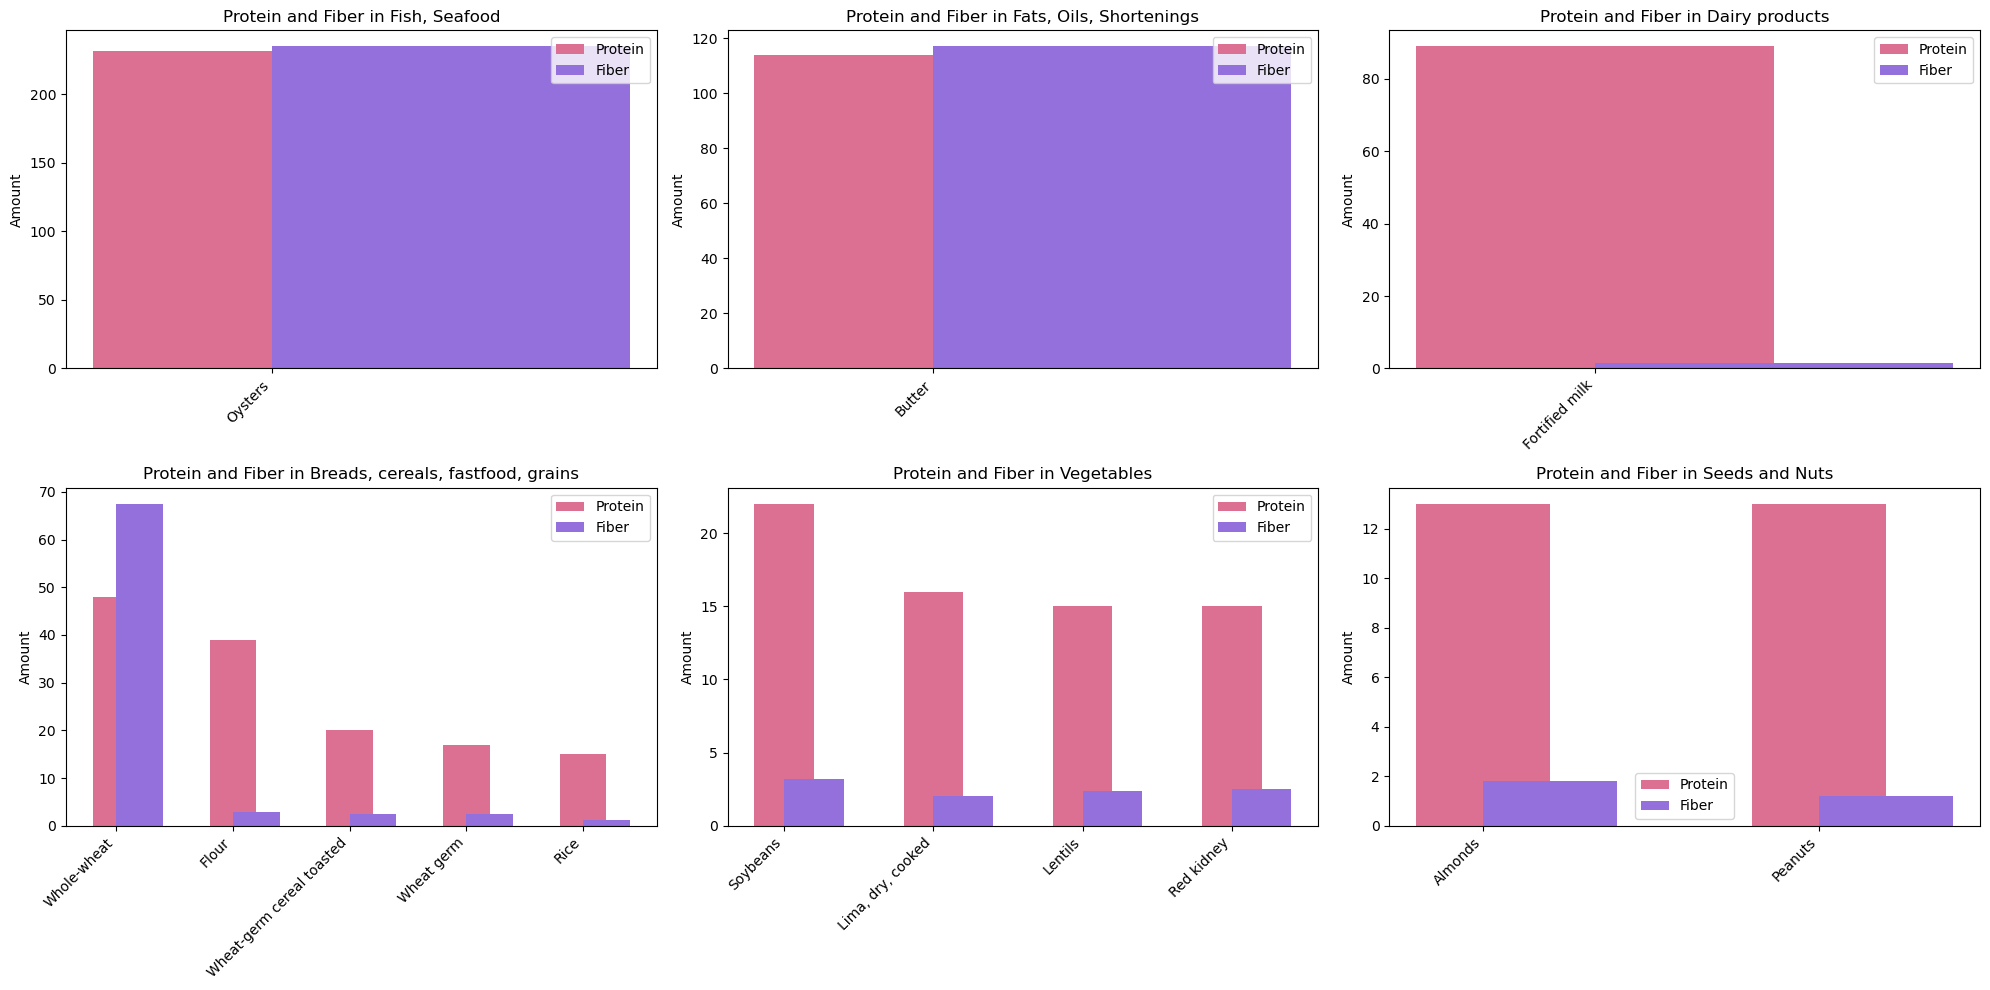

In [23]:
categories = highprotein_and_highfiber_top5['Category'].unique()
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20, 10))
axes = axes.flatten()
for ax, category in zip(axes, categories):
    category_data = highprotein_and_highfiber_top5[highprotein_and_highfiber_top5['Category'] == category]
    food_items = category_data['Food']
    protein_values = category_data['Protein']
    fiber_values = category_data['Fiber']
    
    ax.bar(food_items, protein_values, width=0.4, label='Protein', align='center',color='palevioletred')
    ax.bar(food_items, fiber_values, width=0.4, label='Fiber', align='edge',color = 'mediumpurple')

    ax.set_ylabel('Amount')
    ax.set_title(f'Protein and Fiber in {category}')
    ax.legend()
    ax.set_xticklabels(food_items, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Food Content distribution by Categories - A pie charts analysis

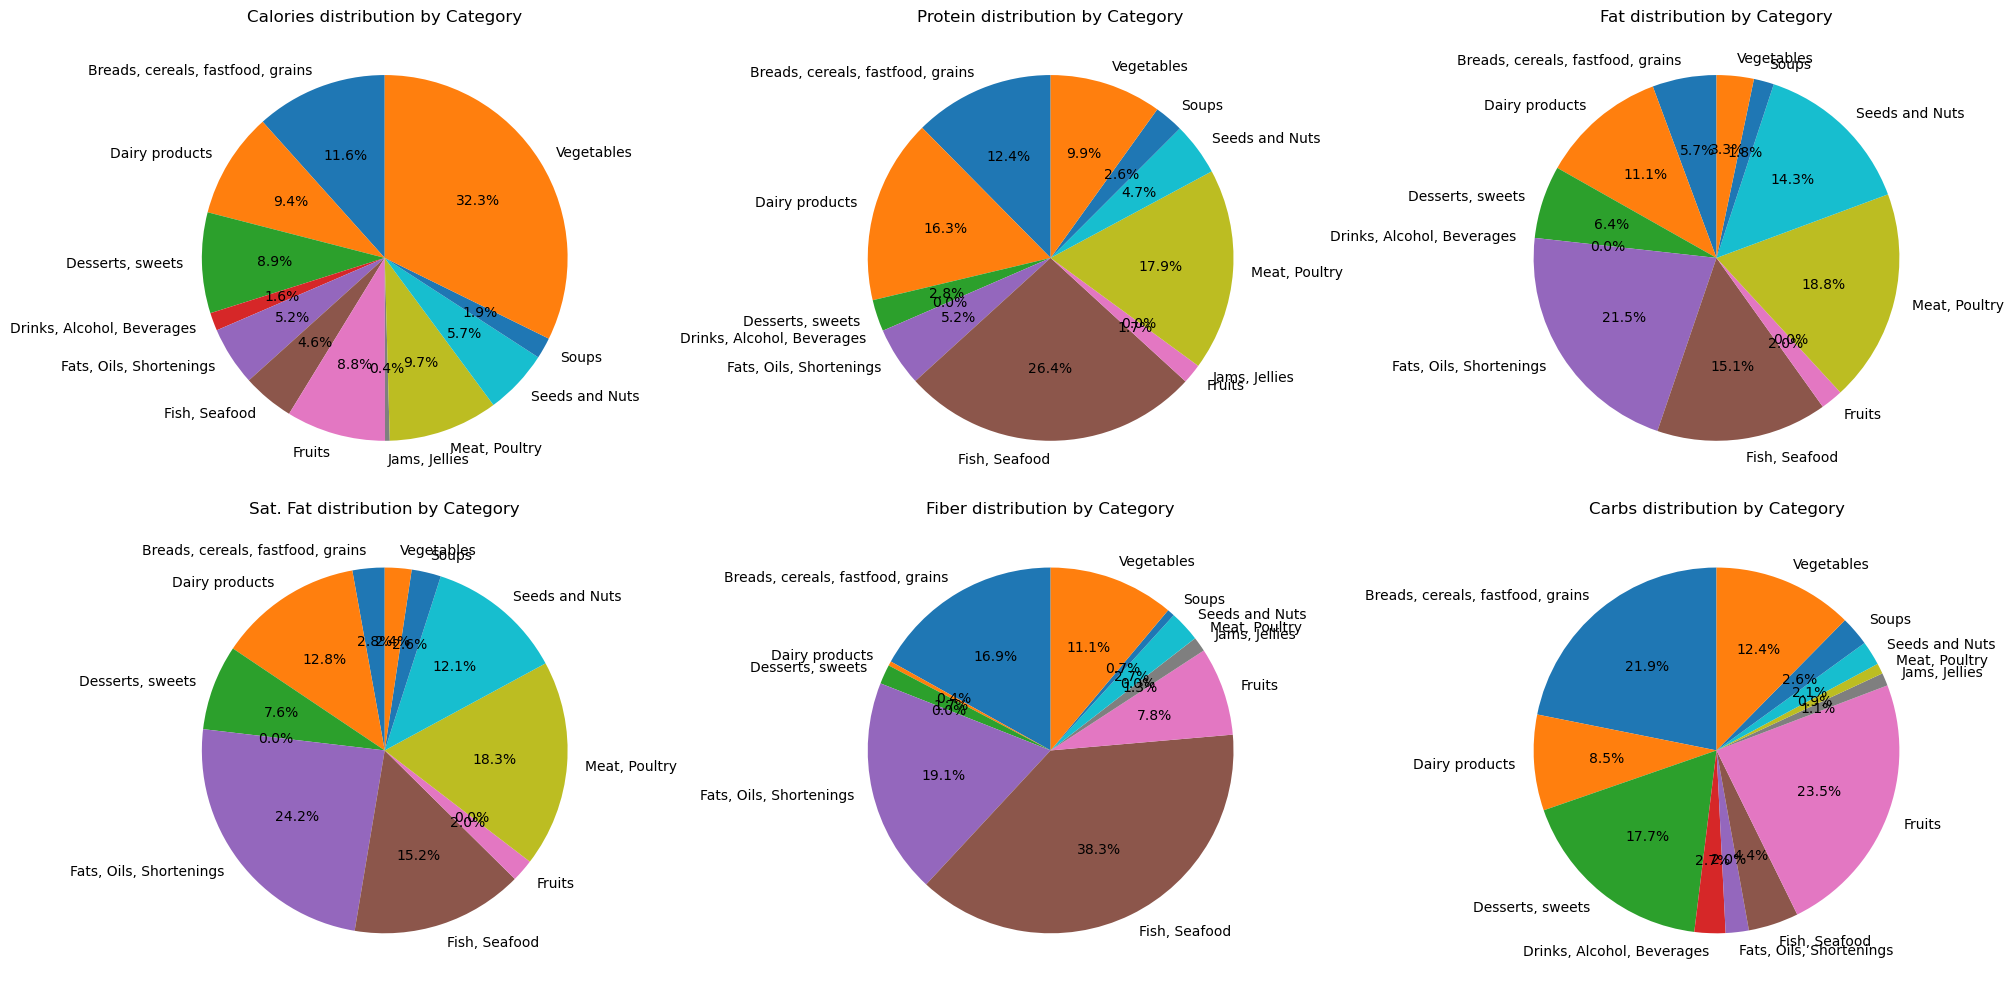

In [24]:
required_columns = ['Calories','Protein', 'Fat', 'Sat. Fat','Fiber', 'Carbs']
grouped_data = data.groupby('Category')[required_columns].sum()

n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(required_columns):
    if i < len(axes):
        grouped_data[column].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90, legend=False)
        axes[i].set_title(f'{column} distribution by Category')
        axes[i].set_ylabel('')
        
plt.tight_layout()
plt.show()

- Calories = More in Vegetables
- Protein = Fish, seafood
- Fat = fats, oils, shortenings
- sat fat = fats, oils, shortenings
- Fiber = Fish, Seafood
- Carbs = Fruits

In [25]:
grouped_data

,Calories,Protein,Fat,Sat. Fat,Fiber,Carbs
Category,,,,,,
"Breads, cereals, fastfood, grains",7417,284.01,130.06,47.00,103.85,1294.00
Dairy products,5965,374.00,256.03,211.03,2.40,501.05
"Desserts, sweets",5676,64.05,148.03,125.02,10.53,1051.00
"Drinks, Alcohol, Beverages",1012,0.03,0.01,0.00,0.00,162.01
"Fats, Oils, Shortenings",3316,120.04,494.00,401.00,117.00,121.03
"Fish, Seafood",2912,606.00,347.00,252.00,235.00,263.01
Fruits,5602,40.07,45.25,33.01,48.01,1392.00
"Jams, Jellies",265,0.01,0.00,0.00,8.00,67.00
"Meat, Poultry",6179,410.00,432.00,303.00,0.03,55.00


# Carbohydrates Analysis

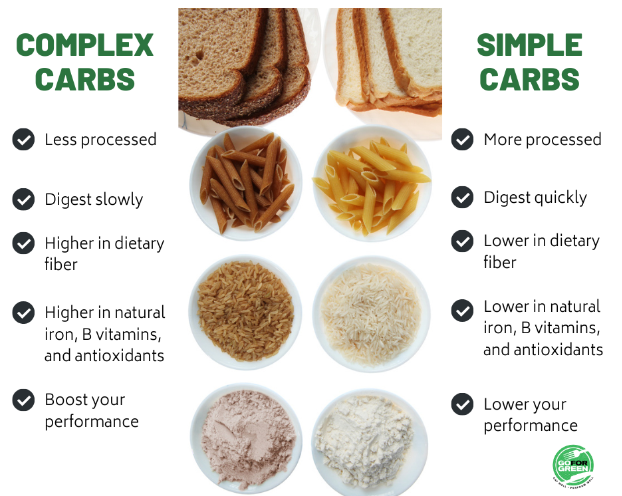

In [26]:
from PIL import Image
img  = Image.open('carbs.png')
img

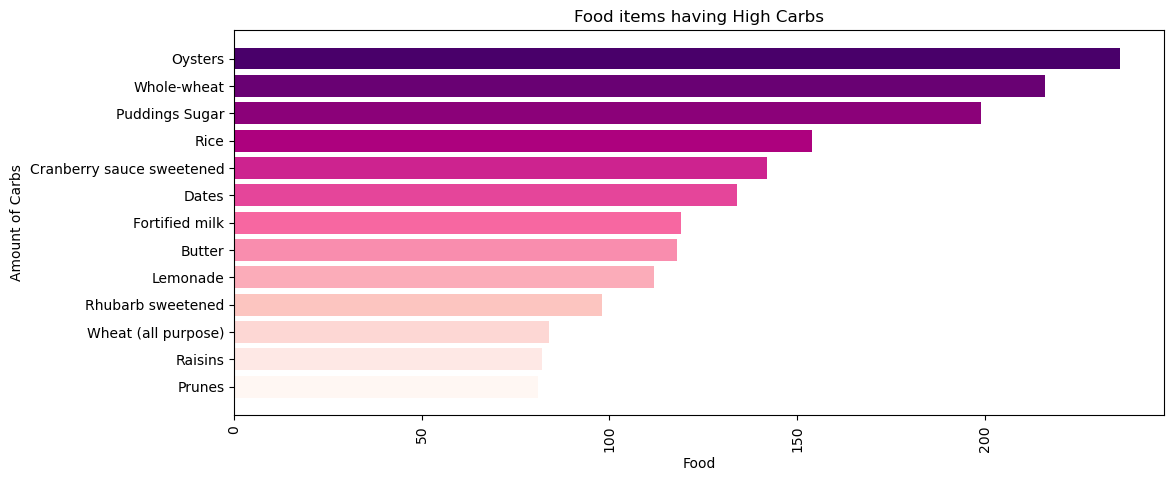

In [27]:
carb = data[data['Carbs'] > 80].sort_values(by='Carbs', ascending=True)
cmap = plt.get_cmap('RdPu')
colors = cmap(np.linspace(0, 1, len(carb['Food'])))
plt.figure(figsize=(12,5))
plt.barh(y=carb['Food'],width=carb['Carbs'], color=colors)
plt.xlabel("Food")
plt.ylabel("Amount of Carbs")
plt.title("Food items having High Carbs")
plt.xticks(rotation=90)
plt.show()

- Simple Carbohydrates  are composed of one or two sugar molecules and are quickly digested and absorbed. They often cause rapid spikes in blood sugar levels.
- Complex carbohydrates are made up of long chains of sugar molecules and take longer to digest. They provide a more gradual and sustained release of energy.

### Carbohydrate Classification

| Simple Carbohydrates           | Complex Carbohydrates      |
|--------------------------------|----------------------------|
| Cranberry sauce sweetened      | Rice                       |
| Dates                          | Wheat (all-purpose)        |
| Fortified milk                 | Whole-wheat                |
| Lemonade                       |                            |
| Prunes                         |                            |
| Puddings Sugar                 |                            |
| Raisins                        |                            |
| Rhubarb sweetened              |                            |


# Nutritional Insights

| **Category**                        | **Food Items**                               | **Nutritional Insights**                                                                                                      |
|-------------------------------------|----------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **Meat and Poultry**                | - Beef<br>- Roasted Chicken                  | - Excellent sources of protein<br>- Relatively low in fats                                                                    |
| **Fish and Seafood**                | - Oysters<br>- Shrimps<br>- Lobster<br>- Clams | - Oysters: High in protein, fiber, and fats (consume in moderation)<br>- Shrimps, Lobster, Clams: High in fiber and protein, low in fat |
| **Vegetables**                      | - Soybeans<br>- Lentils<br>- Red Kidney Beans<br>- Radishes<br>- Cucumbers<br>- Rutabagas (Root Vegetable) | - Soybeans, Lentils, Red Kidney Beans: High in protein<br>- Radishes, Cucumbers, Rutabagas: No fats, great for weight management |
| **Dairy Products**                  | - Milk<br>- Ice Cream<br>- Skim Milk<br>- Cheddar Cheese | - Milk: High in protein and fats<br>- Ice Cream: High in protein but also high in fats<br>- Skim Milk: Lower-fat alternative<br>- Cheddar Cheese: Low in fat and high in protein |
| **Breads, Cereals, Fast Food, Grains** | - Rice<br>- Wheat (all-purpose)<br>- Wheat (whole)<br>- Corn Meal<br>- Oatmeal | - Rice, Wheat (all-purpose): High in carbohydrates (complex carbs, should be consumed in moderation)<br>- Wheat (whole), Corn Meal: Moderately high in carbs, better than all-purpose wheat<br>- Oatmeal: Low in carbs, high in fiber |
| **Soups**                           | - Bouillon<br>- Vegetable Soup<br>- Chicken Soup | - Low in fats and high in protein                                                                                              |
| **Seeds and Nuts**                  | - Almonds<br>- Sunflower Seeds<br>- Peanuts | - High in protein, fiber, and healthy fats                                                                                     |
| **Fruits**                          | - Blackberries<br>- Dates<br>- Watermelons<br>- Cantaloupe | - Rich in fibers, essential for digestive health                                                                               |
| **Fats, Oils, Shortenings**         | - Yolks<br>- Butter                          | - Yolks: Contains fats in acceptable amounts<br>- Butter: High in fats, saturated fats, protein, fiber, carbs, and calories (considered less healthy) |
| **Desserts and Sweets**             | - Chocolate Syrup                            | - Contains no protein, fat, saturated fat, or fiber<br>- Moderately high in calories                                           |
| **Jams and Jellies**                | - Molasses                                   | - The most appropriate food choice in this category                                                                           |
